<a href="https://colab.research.google.com/github/nimamt/machine_learning/blob/master/tf/FunctionalAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

Functional API.  
Wide & Deep neural network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
  housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
  X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss='mean_squared_error', optimizer='sgd')

In [6]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7509 - val_loss: 0.5181
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6174 - val_loss: 0.5202
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8625 - val_loss: 1.1737
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6732 - val_loss: 2.1909
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8685 - val_loss: 0.4565
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4342 - val_loss: 0.4464
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4209 - val_loss: 0.4772
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5492 - val_loss: 0.4357
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4322 - val_loss: 0.4677
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4049 - val_loss: 0.4285

In [7]:
hist = pd.DataFrame(history.history)

hist.head()

,loss,val_loss
0,0.750865,0.518126
1,0.617445,0.520156
2,0.862516,1.173658
3,0.673227,2.190917
4,0.868470,0.456479


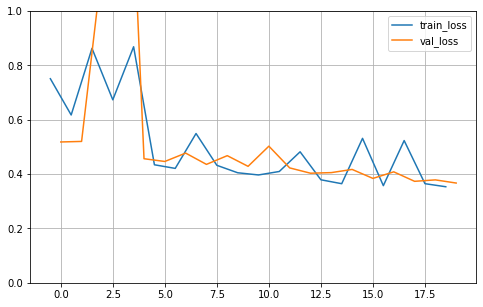

In [8]:
# pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.figure(figsize=(8,5))
epochs = np.arange(0, len(hist["loss"]))
plt.plot(epochs - 0.5, hist["loss"], label="train_loss")
plt.plot(epochs, hist["val_loss"], label="val_loss")
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Part 2

But what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path? 

In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7)

In [12]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [11]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.3371 - val_loss: 0.9602
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8005 - val_loss: 0.7011
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6545 - val_loss: 0.6239
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5973 - val_loss: 0.5846
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5657 - val_loss: 0.5609
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5442 - val_loss: 0.5435
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5275 - val_loss: 0.5306
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5163 - val_loss: 0.5205
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5073 - val_loss: 0.5141
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4994 - val_loss: 0.5101

In [13]:
hist = pd.DataFrame(history.history)

hist.head()

,loss,val_loss
0,2.337125,0.960244
1,0.800534,0.701066
2,0.654494,0.623868
3,0.597308,0.584555
4,0.565695,0.560880


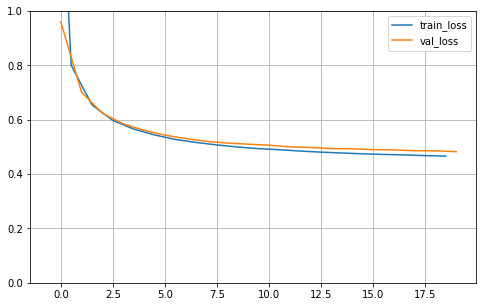

In [14]:
# pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.figure(figsize=(8,5))
epochs = np.arange(0, len(hist["loss"]))
plt.plot(epochs - 0.5, hist["loss"], label="train_loss")
plt.plot(epochs, hist["val_loss"], label="val_loss")
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Part 3
There are many use cases in which you may want to have multiple outputs

In [15]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [16]:
history = model.fit(
  [X_train_A, X_train_B], [y_train, y_train], epochs=20,
  validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 4s 9ms/step - loss: 1.0929 - main_output_loss: 0.8748 - aux_output_loss: 3.0565 - val_loss: 0.6992 - val_main_output_loss: 0.6205 - val_aux_output_loss: 1.4076
Epoch 2/20
363/363 [==============================] - 3s 7ms/step - loss: 0.7807 - main_output_loss: 0.7196 - aux_output_loss: 1.3297 - val_loss: 0.5870 - val_main_output_loss: 0.5256 - val_aux_output_loss: 1.1397
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5675 - main_output_loss: 0.5093 - aux_output_loss: 1.0921 - val_loss: 0.5475 - val_main_output_loss: 0.4974 - val_aux_output_loss: 0.9992
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5423 - main_output_loss: 0.4956 - aux_output_loss: 0.9618 - val_loss: 0.5385 - val_main_output_loss: 0.4984 - val_aux_output_loss: 0.8996
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5003 - main_output_loss: 0.4607 - aux_output_loss: 0.8564 - val_loss

In [17]:
total_loss, main_loss, aux_loss = model.evaluate(
  [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.3604 - main_output_loss: 0.3438 - aux_output_loss: 0.5101


In [18]:
total_loss

0.3604336977005005

In [19]:
hist = pd.DataFrame(history.history)

hist.head()

,loss,main_output_loss,aux_output_loss,val_loss,val_main_output_loss,val_aux_output_loss
0,1.092935,0.874762,3.056493,0.699182,0.620472,1.407577
1,0.780653,0.719644,1.329736,0.587040,0.525636,1.139675
2,0.567549,0.509261,1.092142,0.547549,0.497367,0.999186
3,0.542257,0.495644,0.961768,0.538523,0.498399,0.899646
4,0.500290,0.460725,0.856385,0.510418,0.476659,0.814250


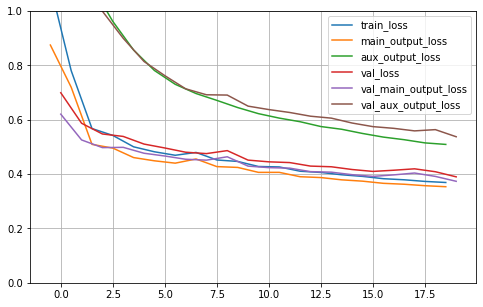

In [22]:
# pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.figure(figsize=(8,5))
epochs = np.arange(0, len(hist["loss"]))
plt.plot(epochs - 0.5, hist["loss"], label="train_loss")
plt.plot(epochs - 0.5, hist["main_output_loss"], label="main_output_loss")
plt.plot(epochs - 0.5, hist["aux_output_loss"], label="aux_output_loss")
plt.plot(epochs, hist["val_loss"], label="val_loss")
plt.plot(epochs, hist["val_main_output_loss"], label="val_main_output_loss")
plt.plot(epochs, hist["val_aux_output_loss"], label="val_aux_output_loss")
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()